In a simple theory, gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved using calculus, taking steps in the negative direction of the function gradient.

In order to see how this mathematical explanation translates into a practical setting, we will use it to optimize a linear regression therefore, demonstrating how it can be used to solve machine learning problems.

Let's import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Let's define artificial data using a linear regression plus noise

A linear regression is defined as

$y = mx + b$

where y and x are respectively dependent and independent variables. m and b are respectively slope and intercepts.
Artificial data will be obtained using the above relation plus some degree of noise

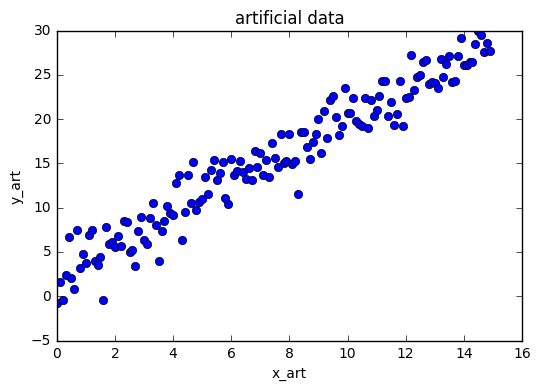

In [2]:
m_art = 1.8
b_art = 2.1
x_art = np.arange(0,15,.1)
y_art = np.random.normal(m_art * x_art + b_art,2)

plt.plot(x_art,y_art,'o')
plt.title('artificial data')
plt.xlabel('x_art')
plt.ylabel('y_art')
plt.show()

For our task, we imagine that we are given the data (x_art,y_art) and we are trying find parameters b_art and m_art

Let's define an error function (also known as Loss or Cost function): This function takes in a pair (m,b) and array of (x,y) returns the mean of squares of difference between y (known) and m*x+b

$L_{(m,b)} = \frac{1}{N} \sum_{i = 1}^{N} (y_i - (mx_i + b))^2$

In [3]:
def loss(b, m, x, y):
    return ((y - (m*x + b))**2).mean()

let's now definet he gradient of the cost function. The gradient will allow us to always move downhill.  Since our function is defined by two parameters (m and b), we will need to compute a partial derivative for each. 

$\frac{\partial}{\partial m} = - \frac{2}{N} \sum_{i=1}^{N} x_i(y_i-(mx_i+b))$

$\frac{\partial}{\partial b} = - \frac{2}{N} \sum_{i=1}^{N} (y_i-(mx_i+b))$

Now, we define a function that will allows us to use the above functions to move in the right direction. We shall use the learningRate variable to control how large of a step we take downhill during each iteration. If the learning_rate is too large, we risk to step over the minimum. If it is too small, we will require many iterations to converge to the right minimum.

In [4]:
def step_gradient(b, m, x, y, learning_rate):
    N = float(len(x))
    b_gradient = -(2/N) * sum(x * (y - (m*x + b)))
    m_gradient = -(2/N) * sum((y - (m*x + b)))
    b = b - (learning_rate * b_gradient)
    m = m - (learning_rate * m_gradient)
    error = loss(b,m,x,y)
    return [b, m, error]

Finally, we write a function to run the optimization and plot the error

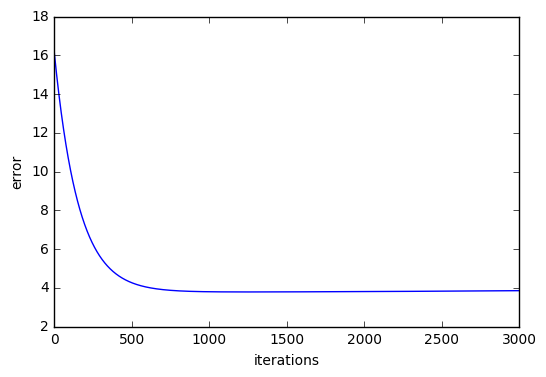

{'error': 3.8492552823268276,
 'n_iters': 3000,
 'slope': 1.8335487400683184,
 'y_intercept': 1.8281274879711411}

In [7]:
def train(x,y,b,m,learning_rate=0.0001,n_iters=1000, plot_error=False):
    params = [[b,m,loss(b,m,x,y)]]
    for i in range(n_iters):
        params.append(step_gradient(params[-1][0],params[-1][1],x,y,learning_rate))
    if plot_error:
        plt.plot(map(lambda x:x[2],params))
        plt.xlabel('iterations')
        plt.ylabel('error')
        plt.show()
    return {'slope':params[-1][0],'y_intercept':params[-1][1],'error':params[-1][2],'n_iters':n_iters}

m_init = 2.
b_init = 4.
train(x_art,y_art,b_init,m_init,n_iters=3000,plot_error=True)